# Import Library Functions

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



C:\Users\soory\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Collection:

Data collection is the process of gathering and measuring information on relevant variables in a methodical way. It can be qualitative or quantitative, and allows researchers to answer research questions, test hypotheses, and evaluate results. Data collection can help organizations understand why people behave in certain ways.

## Read Dataset as .csv file

In [2]:
cust_data = pd.read_csv("marketing_campaigns.csv")

In [3]:
cust_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Preparation

In [4]:
cust_data_1 = cust_data[["ID","Year_Birth","Education","Marital_Status","Income","Kidhome","Teenhome",
           "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]]

cust_data_1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2,9,3,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,7,8,2,5,7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1,2,3,13,6
2238,8235,1956,Master,Together,69245.0,0,1,2,6,5,10,3


## Total amount spent by every customers

total amount spent is a key metric in customer segmentation as it provides valuable insights into customers' purchasing behavior, value to the business, and potential for personalized marketing and targeting strategies

In [5]:
cust_data["TotalAmountSpent"] = cust_data["MntFishProducts"] + cust_data["MntFruits"] + cust_data["MntGoldProds"] + cust_data["MntSweetProducts"] + cust_data["MntMeatProducts"] + cust_data["MntWines"]


In [6]:
cust_data_1 = pd.concat([cust_data_1,cust_data[["TotalAmountSpent"]]],axis=1)
cust_data_1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAmountSpent
0,5524,1957,Graduation,Single,58138.0,0,0,3,8,10,4,7,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2,1,1,2,5,27
2,4141,1965,Graduation,Together,71613.0,0,0,1,8,2,10,4,776
3,6182,1984,Graduation,Together,26646.0,1,0,2,2,0,4,6,53
4,5324,1981,PhD,Married,58293.0,1,0,5,5,3,6,5,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2,9,3,4,5,1341
2236,4001,1946,PhD,Together,64014.0,2,1,7,8,2,5,7,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1,2,3,13,6,1241
2238,8235,1956,Master,Together,69245.0,0,1,2,6,5,10,3,843


## Data Transformation:

Data transformation is the process of changing the structure or format of data to make it more useful for analysis and visualization.

### Encoding Categorical Variables:

In [7]:
df_encoded = pd.get_dummies(cust_data_1, columns=['Education', 'Marital_Status'])
current_year = 2024

df_encoded['Age'] = current_year - df_encoded[['Year_Birth']]

df_encoded = df_encoded.drop('Year_Birth',axis=1)

In [8]:
df_encoded['No_of_Childrens'] = df_encoded['Kidhome'] + df_encoded['Teenhome']
df_encoded

,ID,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAmountSpent,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,No_of_Childrens
0,5524,58138.0,0,0,3,8,10,4,7,1617,...,0,0,0,0,1,0,0,0,67,0
1,2174,46344.0,1,1,2,1,1,2,5,27,...,0,0,0,0,1,0,0,0,70,2
2,4141,71613.0,0,0,1,8,2,10,4,776,...,0,0,0,0,0,1,0,0,59,0
3,6182,26646.0,1,0,2,2,0,4,6,53,...,0,0,0,0,0,1,0,0,40,1
4,5324,58293.0,1,0,5,5,3,6,5,422,...,0,0,0,1,0,0,0,0,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,2,9,3,4,5,1341,...,0,0,0,1,0,0,0,0,57,1
2236,4001,64014.0,2,1,7,8,2,5,7,444,...,0,0,0,0,0,1,0,0,78,3
2237,7270,56981.0,0,0,1,2,3,13,6,1241,...,0,0,1,0,0,0,0,0,43,0
2238,8235,69245.0,0,1,2,6,5,10,3,843,...,0,0,0,0,0,1,0,0,68,1


# Standardization of numerical Variables: 


Standardization is a data preprocessing technique that transforms data into a common format. This can make it easier to compare and analyze different datasets, and it can also improve the performance of machine learning models.'TotalAmountSpent' could range from hundreds to thousands, while 'NumWebVisitsMonth' might range from 1 to 10. Without standardization, the algorithm might give more weight to 'TotalAmountSpent', which has a larger scale, overshadowing the importance of other features.

In [9]:
numerical_features = ['TotalAmountSpent', 'NumDealsPurchases', 'NumWebVisitsMonth', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases']
data_subset = df_encoded[numerical_features]


scaler = StandardScaler()


data_scaled = scaler.fit_transform(data_subset)


scaled_df = pd.DataFrame(data_scaled, columns=numerical_features)
scaled_df

,TotalAmountSpent,NumDealsPurchases,NumWebVisitsMonth,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1.679417,0.349414,0.693904,1.409304,2.510890,-0.550785
1,-0.961275,-0.168236,-0.130463,-1.110409,-0.568720,-1.166125
2,0.282673,-0.685887,-0.542647,1.409304,-0.226541,1.295237
3,-0.918094,-0.168236,0.281720,-0.750450,-0.910898,-0.550785
4,-0.305254,1.384715,-0.130463,0.329427,0.115638,0.064556
...,...,...,...,...,...,...
2235,1.221032,-0.168236,-0.130463,1.769263,0.115638,-0.550785
2236,-0.268717,2.420015,0.693904,1.409304,-0.226541,-0.243114
2237,1.054951,-0.685887,0.281720,-0.750450,0.115638,2.218248
2238,0.393948,-0.168236,-0.954831,0.689386,0.799996,1.295237


In [10]:
df_encoded.update(scaled_df)
df_encoded

,ID,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAmountSpent,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,No_of_Childrens
0,5524,58138.0,0,0,0.349414,1.409304,2.510890,-0.550785,0.693904,1.679417,...,0,0,0,0,1,0,0,0,67,0
1,2174,46344.0,1,1,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.961275,...,0,0,0,0,1,0,0,0,70,2
2,4141,71613.0,0,0,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.282673,...,0,0,0,0,0,1,0,0,59,0
3,6182,26646.0,1,0,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.918094,...,0,0,0,0,0,1,0,0,40,1
4,5324,58293.0,1,0,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.305254,...,0,0,0,1,0,0,0,0,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,-0.168236,1.769263,0.115638,-0.550785,-0.130463,1.221032,...,0,0,0,1,0,0,0,0,57,1
2236,4001,64014.0,2,1,2.420015,1.409304,-0.226541,-0.243114,0.693904,-0.268717,...,0,0,0,0,0,1,0,0,78,3
2237,7270,56981.0,0,0,-0.685887,-0.750450,0.115638,2.218248,0.281720,1.054951,...,0,0,1,0,0,0,0,0,43,0
2238,8235,69245.0,0,1,-0.168236,0.689386,0.799996,1.295237,-0.954831,0.393948,...,0,0,0,0,0,1,0,0,68,1


### Scaling Numerical Variable:


In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled

array([[-0.0209985 ,  0.2340627 , -0.82521765, ..., -0.02989406,
         0.98534473, -1.2645053 ],
       [-1.05305783, -0.23455948,  1.03255877, ..., -0.02989406,
         1.23573295,  1.39636071],
       [-0.44706956,  0.76947764, -0.82521765, ..., -0.02989406,
         0.3176428 , -1.2645053 ],
       ...,
       [ 0.51690466,  0.18809052, -0.82521765, ..., -0.02989406,
        -1.01776106, -1.2645053 ],
       [ 0.81419936,  0.67538765, -0.82521765, ..., -0.02989406,
         1.06880747,  0.06592771],
       [ 1.17464994,  0.02470453,  1.03255877, ..., -0.02989406,
         1.23573295,  1.39636071]])

## Exploratory Data Analysis:

Exploratory Data Analysis (EDA) in customer segmentation is to gain insights and understanding about the underlying patterns, trends, and characteristics present in the customer data. EDA plays a crucial role in the initial stages of the segmentation process by helping analysts and data scientists

### Types of EDA:
    1.Univariate Analysis
    2.Bivariate Analysis
    3.Multivariate Analysis

### Univariate Analysis:
This involves the analysis of a single variable at a time. Common techniques include:

Histograms: to visualize the distribution of numerical variables.
Bar charts: to visualize the frequency distribution of categorical variables.
Summary statistics: such as mean, median, mode, variance, and standard deviation.

Text(0.5, 1.0, "Distribution of Customer's Age")

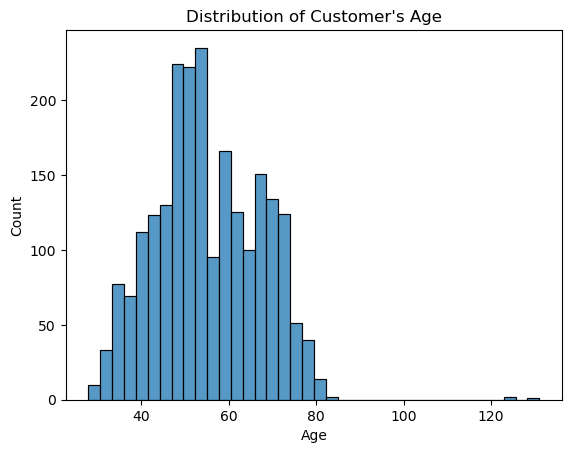

In [12]:
sns.histplot(data=df_encoded, x="Age")
plt.title("Distribution of Customer's Age")

### Bivariate Analysis:

Involves the analysis of the relationship between two variables. Common techniques include:

Scatter plots: to visualize the relationship between two numerical variables.
Box plots: to compare the distribution of a numerical variable across different categories of a categorical variable.
Correlation analysis: to quantify the strength and direction of the relationship between two numerical variables.

In [53]:
fig = px.scatter(data_frame=df_encoded, x="Income",
                 y="TotalAmountSpent",
                 title="Relationship Between Customer's Income and Total Amount Spent",
                height=500,
                 width= 1000,
                color = 'Age')
fig.show()

### Multivariate Analysis:

Involves the analysis of the relationship between three or more variables. Common techniques include:

Heatmaps: to visualize the pairwise correlation between multiple numerical variables.
Parallel coordinates plot: to visualize the relationship between multiple numerical variables across different categories.
Cluster analysis: to identify groups or clusters of observations with similar characteristics.


In [54]:
fig = px.scatter(
    data_frame=cust_data_1,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Age",
    color = "Education",
    height=500,
    width= 1000
)
fig.show()

In [15]:
fig = px.bar(cust_data_1, x='Education', y='Income', color='ID', title='Income by Education and ID')
fig.update_layout(xaxis_title='Education', yaxis_title='Income')
fig.show()

### Analysis of TotalAmountSpent by Marital Status

In [16]:
fig = px.bar(cust_data_1, x='Marital_Status', y='TotalAmountSpent', color='Income', title='Total Amount by Marital Status and Income')
fig.update_layout(xaxis_title='Marital Status', yaxis_title='TotalAmountSpent')
fig.show()

## Correlation Matrix between MaritalStatus and TotalAmountSpent

In [17]:
marital_status_columns = ['Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO']
Total_amt = 'TotalAmountSpent'


correlation_matrix = df_encoded[marital_status_columns + [Total_amt]].corr()


marital_status_amt_correlation = correlation_matrix['TotalAmountSpent'][marital_status_columns]

In [18]:
marital_status_amt_correlation

Marital_Status_Absurd      0.029129
Marital_Status_Alone      -0.021234
Marital_Status_Divorced    0.002727
Marital_Status_Married    -0.019735
Marital_Status_Single      0.000594
Marital_Status_Together    0.002542
Marital_Status_Widow       0.041683
Marital_Status_YOLO       -0.009026
Name: TotalAmountSpent, dtype: float64

In [19]:
import plotly.graph_objs as go

heatmap = go.Heatmap(z=correlation_matrix.values,
                     x=correlation_matrix.columns,
                     y=correlation_matrix.columns,
                     colorscale='Viridis')

layout = go.Layout(title='Correlation Heatmap')

fig = go.Figure(data=[heatmap], layout=layout)

fig.show()

## Correlation Between Income and Education

In [20]:
Education =['Education_2n Cycle','Education_Basic', 'Education_Graduation', 'Education_Master','Education_PhD']

Inc_column = 'Income'


correlation_matrix = df_encoded[Education + [Inc_column]].corr()


Education_income_correlation = correlation_matrix['Income'][Education]
Education_income_correlation

Education_2n Cycle     -0.057745
Education_Basic        -0.200576
Education_Graduation    0.018935
Education_Master        0.011827
Education_PhD           0.081552
Name: Income, dtype: float64

In [21]:

fig = px.imshow(correlation_matrix, color_continuous_scale='RdBu')

fig.update_layout(title='Correlation between Income and Education', xaxis_title='Features', yaxis_title='Features')

fig.show()

## Correlation Between Income & TotalAmountSpent

In [22]:
Tot_amt = 'TotalAmountSpent'
income_column = 'Income'


correlation_matrix = df_encoded[[Tot_amt] + [income_column]].corr()


Tot_amt_income_correlation = correlation_matrix.loc[Tot_amt,income_column]
Tot_amt_income_correlation

0.667576090388827

In [23]:
heatmap = go.Heatmap(z=correlation_matrix.values,
                     x=correlation_matrix.columns,
                     y=correlation_matrix.columns,
                     colorscale='ylgnbu')

layout = go.Layout(title='Correlation Heatmap')

fig = go.Figure(data=[heatmap], layout=layout)

fig.show()

## Correlation Between Kidhome, Teenhome & TotalAmountSpent

In [24]:
Tot_amt = 'TotalAmountSpent'
Kid_Teen = ['Kidhome','Teenhome']


correlation_matrix = df_encoded[Kid_Teen + [Tot_amt]].corr()


Tot_amt_income_correlation = correlation_matrix['TotalAmountSpent'][Kid_Teen]
Tot_amt_income_correlation

Kidhome    -0.556669
Teenhome   -0.138384
Name: TotalAmountSpent, dtype: float64

In [25]:
fig = px.imshow(correlation_matrix, color_continuous_scale='burg')

fig.update_layout(title='Correlation between Kid,Teen with Education', xaxis_title='Features', yaxis_title='Features')

fig.show()

## Correlation Between Num of Purchases with TotalAmountSpent

In [26]:
Num_purchase = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']
Tot_amt = "TotalAmountSpent"


correlation_matrix = df_encoded[Num_purchase + [Tot_amt]].corr()


Num_purchase_Amt_correlation = correlation_matrix['TotalAmountSpent'][Num_purchase]
Num_purchase_Amt_correlation

NumDealsPurchases     -0.065112
NumWebPurchases        0.519837
NumCatalogPurchases    0.778577
NumStorePurchases      0.674669
NumWebVisitsMonth     -0.500218
Name: TotalAmountSpent, dtype: float64

In [27]:
heatmap = go.Heatmap(x = correlation_matrix.columns,
                     y = correlation_matrix.columns,
                     z = correlation_matrix.values,
                     colorscale='purples')

#creating layout
Layout = go.Layout(title='Correlation between Purchases and Amount spent')

#Adding data to be displayed
fig = go.Figure(data=[heatmap],layout=Layout)

#displaying of correlation
fig.show()

In [28]:
Neg_Cor_with_amt = df_encoded[['ID','TotalAmountSpent','Kidhome', 'Teenhome',
                              'Marital_Status_Alone','Marital_Status_Married','NumDealsPurchases','NumWebVisitsMonth','No_of_Childrens']]

In [29]:
Neg_Cor_with_amt

,ID,TotalAmountSpent,Kidhome,Teenhome,Marital_Status_Alone,Marital_Status_Married,NumDealsPurchases,NumWebVisitsMonth,No_of_Childrens
0,5524,1.679417,0,0,0,0,0.349414,0.693904,0
1,2174,-0.961275,1,1,0,0,-0.168236,-0.130463,2
2,4141,0.282673,0,0,0,0,-0.685887,-0.542647,0
3,6182,-0.918094,1,0,0,0,-0.168236,0.281720,1
4,5324,-0.305254,1,0,0,1,1.384715,-0.130463,1
...,...,...,...,...,...,...,...,...,...
2235,10870,1.221032,0,1,0,1,-0.168236,-0.130463,1
2236,4001,-0.268717,2,1,0,0,2.420015,0.693904,3
2237,7270,1.054951,0,0,0,0,-0.685887,0.281720,0
2238,8235,0.393948,0,1,0,0,-0.168236,-0.954831,1


# 

# Model Building:

## Targeted Marketing and Promotions: 

By segmenting customers based on their purchasing behavior (e.g., total amount spent, number of deals/purchases), retailers can tailor marketing campaigns and promotions to specific customer groups. For example, customers who frequently make high-value purchases may be targeted with loyalty programs or exclusive offers, while those who are more price-sensitive may respond better to discount promotions.

In [30]:
X_variables = Neg_Cor_with_amt[['TotalAmountSpent','NumDealsPurchases']]

In [31]:
X_variables

,TotalAmountSpent,NumDealsPurchases
0,1.679417,0.349414
1,-0.961275,-0.168236
2,0.282673,-0.685887
3,-0.918094,-0.168236
4,-0.305254,1.384715
...,...,...
2235,1.221032,-0.168236
2236,-0.268717,2.420015
2237,1.054951,-0.685887
2238,0.393948,-0.168236


## Model Building using K-Means:

## Elbow Method:


The elbow method, also known as the elbow criterion or the knee method, is a heuristic used to determine the optimal number of clusters in a dataset for techniques such as K-means clustering. It is based on the principle that as the number of clusters increases, the within-cluster sum of squares (WCSS) typically decreases. The WCSS measures the compactness of the clusters, indicating how close the data points within each cluster are to the centroid of that cluster.

The term "elbow" refers to the point in the plot where the rate of decrease in WCSS slows down significantly, forming a noticeable bend in the curve. The optimal number of clusters is typically chosen as the point just before this bend, as it represents a good balance between minimizing within-cluster distance and avoiding overfitting.

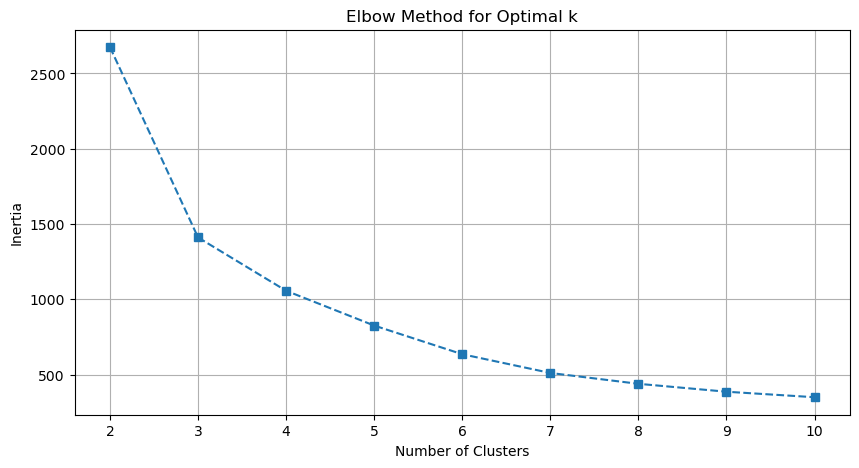

In [32]:
# Calculate the sum of squared distances (inertia) for different values of k
inertia_values = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_variables)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_variables, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia_values, marker='s', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

## silhouette coefficient: 

The silhouette coefficient is a metric that measures how similar a data point is to other clusters within a cluster. It can be used to determine the optimal number of clusters in K-means clustering.

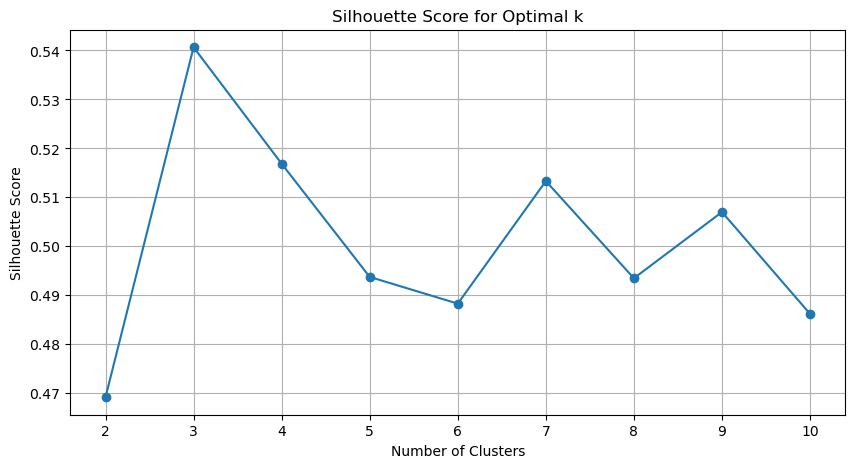

In [33]:
# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [34]:
#No of clusters
n_clusters = 3

#defining the kmeans clusters
kmeans = KMeans(n_clusters=n_clusters)

#fitting the data for clustering
cluster_assignments = kmeans.fit_predict(X_variables)
print(cluster_assignments)

[1 0 1 ... 1 1 0]


In [35]:
# Define the number of clusters
n_clusters = 3
cluster_traces = []

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(X_variables[['TotalAmountSpent', 'NumDealsPurchases']])

# Create a list to store traces for each cluster
cluster_traces = []

# Plot each cluster
for i in range(n_clusters):
    cluster_data = X_variables[cluster_assignments == i]
    trace = go.Scatter(x=cluster_data["TotalAmountSpent"], y=cluster_data["NumDealsPurchases"], mode='markers', 
                       name=f'Cluster {i+1}')
    cluster_traces.append(trace)

# Plot cluster centroids
centroid_trace = go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers', 
                            marker=dict(symbol='x', size=10, color='black'), name='Centroids')

# Combine cluster traces and centroid trace
fig = go.Figure(data=cluster_traces + [centroid_trace])

# Update layout
fig.update_layout(title='KMeans Clustering', xaxis_title='Total Amount Spent', yaxis_title='Number of Deals/Purchases',
                  showlegend=True, legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

# Show plot
fig.show()

In [36]:
for i in range(n_clusters):
    cluster_data = X_variables[cluster_assignments == i]
    print(f"Data for Cluster {i+1}:")
    print(cluster_data)

Data for Cluster 1:
      TotalAmountSpent  NumDealsPurchases
1            -0.961275          -0.168236
3            -0.918094          -0.168236
5             0.183025          -0.168236
7            -0.725440          -0.168236
8            -0.929720          -0.685887
...                ...                ...
2230         -0.866609           0.349414
2232         -0.969580          -0.685887
2233         -0.903147           0.867064
2234         -0.956293          -0.685887
2239         -0.720458           0.349414

[1236 rows x 2 columns]
Data for Cluster 2:
      TotalAmountSpent  NumDealsPurchases
4            -0.305254           1.384715
6            -0.026238           0.867064
21            1.867089           6.561217
24           -0.268717           2.420015
33           -0.504552           1.902365
...                ...                ...
2219         -0.316880           0.867064
2225         -0.032881           1.902365
2226          0.078393           2.937665
2227       

## Model Building Using DBSCAN:



In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN algorithm to the data
dbscan.fit(X_variables)

# Extract the cluster labels
cluster_labels = dbscan.labels_
print("cluster labels: " ,cluster_labels)

# Add the cluster labels to the DataFrame
X_variables['Cluster'] = cluster_labels

# Print the number of clusters (ignoring noise, indicated by -1 label)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", num_clusters)

# Print the number of noise points
num_noise = list(cluster_labels).count(-1)
print("Number of noise points:", num_noise)

# You can further analyze the clusters by examining the data points in each cluster
for cluster_id in set(cluster_labels):
    if cluster_id != -1:  # Ignore noise points
        cluster_data = X_variables[X_variables['Cluster'] == cluster_id]
        print(f"Cluster {cluster_id} has {len(cluster_data)} data points.")
        print(cluster_data)

cluster labels:  [0 1 2 ... 2 1 0]
Number of clusters: 10
Number of noise points: 28
Cluster 0 has 297 data points.
      TotalAmountSpent  NumDealsPurchases  Cluster
0             1.679417           0.349414        0
13           -0.491265           0.349414        0
16           -0.846679           0.349414        0
22            0.608193           0.349414        0
23           -0.102635           0.349414        0
...                ...                ...      ...
2220         -0.225535           0.349414        0
2223         -0.921416           0.349414        0
2224          0.121574           0.349414        0
2230         -0.866609           0.349414        0
2239         -0.720458           0.349414        0

[297 rows x 3 columns]
Cluster 1 has 497 data points.
      TotalAmountSpent  NumDealsPurchases  Cluster
1            -0.961275          -0.168236        1
3            -0.918094          -0.168236        1
5             0.183025          -0.168236        1
7            

C:\Users\soory\AppData\Local\Temp\ipykernel_1064\1654600461.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
cluster_data = X_variables[X_variables['Cluster'] != -1]
cluster_data

,TotalAmountSpent,NumDealsPurchases,Cluster
0,1.679417,0.349414,0
1,-0.961275,-0.168236,1
2,0.282673,-0.685887,2
3,-0.918094,-0.168236,1
4,-0.305254,1.384715,3
...,...,...,...
2235,1.221032,-0.168236,1
2236,-0.268717,2.420015,5
2237,1.054951,-0.685887,2
2238,0.393948,-0.168236,1


In [39]:

# Print the number of noise points
num_noise = X_variables[X_variables['Cluster'] == -1]
cluster_data = X_variables[X_variables['Cluster'] != -1]




# Create scatter plot
fig = go.Figure()



#Add data points
fig.add_trace(go.Scatter(x=cluster_data['TotalAmountSpent'], y=cluster_data['NumDealsPurchases'],  mode='markers',
                                 marker=dict(color=cluster_data['Cluster'], colorscale='viridis', size=8),
                                 name='Data Points'))

#Add noise points
fig.add_trace(go.Scatter(x=num_noise['TotalAmountSpent'], y=num_noise['NumDealsPurchases'], mode='markers',
                                 marker=dict(color='black', size=8, symbol='x'),
                                 name='Noise Points'))

# Update layout
fig.update_layout(title='DBSCAN Clustering',
                  xaxis_title='Total Amount Spent',
                  yaxis_title='Num Deals Purchases')

# Show plot
fig.show()

## Inventory Management Optimization:

Inventory management refers to the process of overseeing and controlling the flow of goods or materials into and out of a company's inventory. It involves monitoring and managing stock levels to ensure that products are available when needed while minimizing the costs associated with holding excess inventory. Effective inventory management involves forecasting demand, optimizing stocking levels, replenishing inventory in a timely manner, and efficiently utilizing storage space. It plays a crucial role in maintaining smooth operations, minimizing stockouts, and maximizing profitability for businesses across various industries..

In [40]:
x_variables = Neg_Cor_with_amt[['ID','No_of_Childrens','NumDealsPurchases','TotalAmountSpent']]

In [41]:
x_variables

,ID,No_of_Childrens,NumDealsPurchases,TotalAmountSpent
0,5524,0,0.349414,1.679417
1,2174,2,-0.168236,-0.961275
2,4141,0,-0.685887,0.282673
3,6182,1,-0.168236,-0.918094
4,5324,1,1.384715,-0.305254
...,...,...,...,...
2235,10870,1,-0.168236,1.221032
2236,4001,3,2.420015,-0.268717
2237,7270,0,-0.685887,1.054951
2238,8235,1,-0.168236,0.393948


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


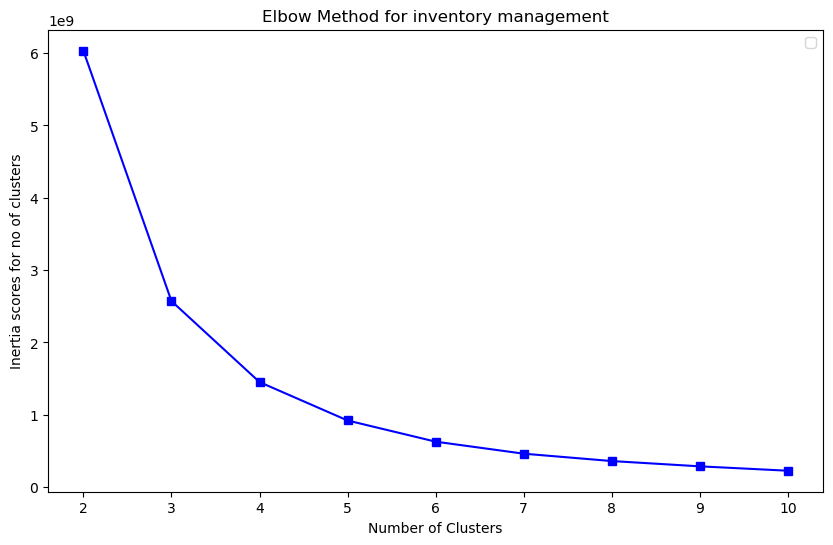

In [42]:
inertia_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_variables)
    inertia_scores.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), inertia_scores, marker = 's', linestyle = '-', color = 'blue')
plt.title('Elbow Method for inventory management')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia scores for no of clusters')
plt.legend()
plt.show()

In [43]:
# Perform K-means clustering
n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_variables[['NumDealsPurchases', 'No_of_Childrens']])

# Add cluster labels to the DataFrame
x_variables['Cluster'] = kmeans.labels_

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Visualize the clusters
fig = px.scatter(x_variables, x='NumDealsPurchases', y='No_of_Childrens', color='Cluster',
                 size = 'No_of_Childrens',
                 color_continuous_scale='agsunset', title='K-means Clustering to find relationship between NumDealsPurchase with Children',
                 labels={'No of Deals': 'NumDealsPurchases', 'No of Childrens': 'No_of_Childrens'})

# Add centroids to the plot
for i in range(n_clusters):
    fig.add_trace(go.Scatter(x=[centroids[i, 0]], y=[centroids[i, 1]], mode='markers',
                             marker=dict(size=15, color='red', symbol='x'),
                             name=f'Centroid {i}'))
# Adjust legend position
fig.update_layout(legend=dict(
    orientation="v",
    yanchor="top",
    y=1,
    xanchor="right",
    x=1.0
))

fig.show()

C:\Users\soory\AppData\Local\Temp\ipykernel_1064\695974111.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Customer Service Optimization:


Customer experience optimization is the process of gaining a deep understanding of your customers and enhancing the customer journey across all touchpoints. In short, it's adopting a customer-centric mentality. it involves tailoring the customer service experience to meet the diverse needs and preferences of different customer segments effectively. It aims to enhance customer satisfaction, loyalty, and retention by providing personalized and timely support throughout the customer journey. 

In [44]:
x_data = df_encoded[['ID','Marital_Status_Alone','Marital_Status_Married','NumDealsPurchases','TotalAmountSpent']]
x_data

,ID,Marital_Status_Alone,Marital_Status_Married,NumDealsPurchases,TotalAmountSpent
0,5524,0,0,0.349414,1.679417
1,2174,0,0,-0.168236,-0.961275
2,4141,0,0,-0.685887,0.282673
3,6182,0,0,-0.168236,-0.918094
4,5324,0,1,1.384715,-0.305254
...,...,...,...,...,...
2235,10870,0,1,-0.168236,1.221032
2236,4001,0,0,2.420015,-0.268717
2237,7270,0,0,-0.685887,1.054951
2238,8235,0,0,-0.168236,0.393948


# KMeans Clustering:

In [45]:
n_clusters = 3

kn = KMeans(n_clusters=n_clusters,random_state=42)

#Add data columns to KMeans
kn.fit(x_data[['NumDealsPurchases','Marital_Status_Alone']])

# Add cluster labels to the DataFrame
x_data['Cluster'] = kn.labels_

# Get cluster centroids
centroids = kn.cluster_centers_

# Visualize the clusters
fig = px.scatter(x_data, x='NumDealsPurchases', y='Marital_Status_Alone', color='Cluster',
                 color_continuous_scale='agsunset', title='K-means Clustering to find relationship between Marital Status with Children',
                 labels={'NumDealsPurchases': 'NumDealsPurchases', 'Marital_Status_Alone': 'Marital_Status_Alone'})

# Add centroids to the plot
for i in range(n_clusters):
    fig.add_trace(go.Scatter(x=[centroids[i, 0]], y=[centroids[i, 1]], mode='markers',
                             marker=dict(size=10, color='red', symbol='x'),
                             name=f'Centroid {i}'))
    
#size updation of data points
fig.update_traces(marker=dict(size=10))

# Adjust legend position
fig.update_layout(legend=dict(
    orientation="v",
    yanchor="top",
    y=1,
    xanchor="right",
    x=1.0
))

fig.show()

C:\Users\soory\AppData\Local\Temp\ipykernel_1064\446787604.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

